# Mesure de l'impureté: Gini et Entropie

La construction d'un arbre de décision implique une décision cruciale à chaque étape : quelle variable choisir pour diviser les données en fonction de la variable cible ? Cette sélection est fondamentale pour l'efficacité de l'arbre résultant. Dans la suite, nous explorerons deux de ces critères essentiels, l'entropie et le critère de Gini.

# Entropie

L'entropie est une mesure d'impureté utilisée dans la construction d'arbres de décision pour résoudre des problèmes de \textbf{classification}. Elle évalue la quantité d'information nécessaire pour décrire de manière optimale un ensemble de données et quantifie l'incertitude ou le désordre au sein d'un nœud.  Généralement, elle est utilisée par les algorithmes ID3 et C4.5.
L'entropie d'un ensemble S est définie par la formule suivante \cite{gini}:
\begin{equation*}
H(S) = - \sum_{i=1}^{n} p(i) \log_2 p(i)
\end{equation*}
où 'n' représente le nombre de classes ou de catégories possibles dans S, et 'p(i)' est la proportion des occurrences de chaque classe de la variable cible dans l'ensemble.\\

Plus l'entropie d'un ensemble est élevée, plus cet ensemble est hétérogène. Dans le contexte de la construction d'un arbre de décision, l'objectif principal est de diviser les données de manière à réduire l'entropie, ce qui conduit à des nœuds plus homogènes et à une meilleure capacité de prise de décision.

Exemple de calcul d'entropie:

Pour illustrer les étapes de calcul de l'entropie, un exemple est présenté en utilisant un échantillon de données comprenant 7 observations. Ces observations sont décrites par une variable catégorielle "Motif d'après-vente du billet", une variable continue "prix du billet" ainsi qu'une variable cible indiquant la présence ou non d'une fraude. En total, il y a  5 cas de non-fraude et 2 cas de fraude.

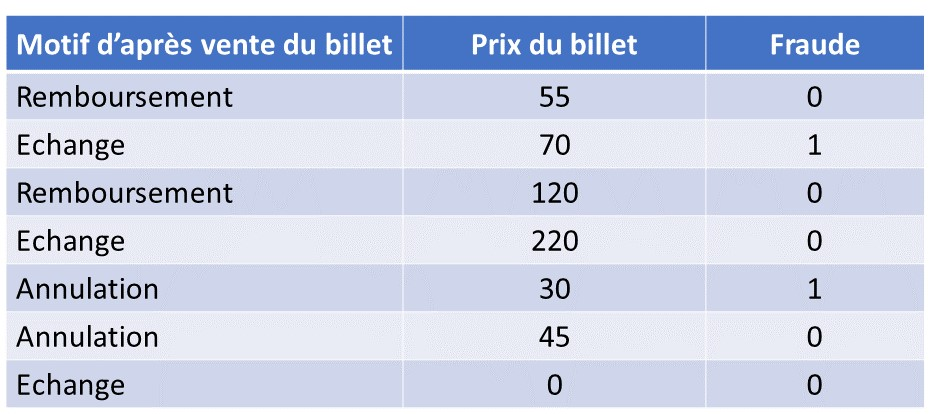

In [5]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/table.jpg"
width = 500
height = 500
Image(filename=image_path, width=width, height=height)

Premièrement, on calcul l'entropie de la variable cible du noeud racine, qui, dans le cas de l'arbre de décision, contient toutes les observations. Pour cela, on applique la formule  suivante: 
$H(S) = -\sum_{i=1}^{m} p_i \log(p_i)$,
avec $p_i$ est la proportion des classes de la variable cible \cite{gini}. Ainsi, 

\begin{equation*}
H(S) = -\frac{5}{7} \cdot \ln(\frac{5}{7}) -\frac{2}{7}\cdot \ln(\frac{2}{7}) 
\end{equation*}

Puis, on doit choisir la meilleure variable qui maximise la pureté des noeuds après la division. Pour cela, on doit calculer le gain d'information de chaque variable explicative en utilisant la formule suivante  : $GI(S;a) = H(S) - \sum_{i=1}^{k} p_i H(S_i)$,(avec $H(S_i)$ est l'entropie de la variable cible dans le noeud fils), et choisir la variable ayant le gain le plus élevé. 
On commence à calculer l'entropie des noeuds fils obtenus après la division par rapport à la variable "Motif d'après vente du billet":

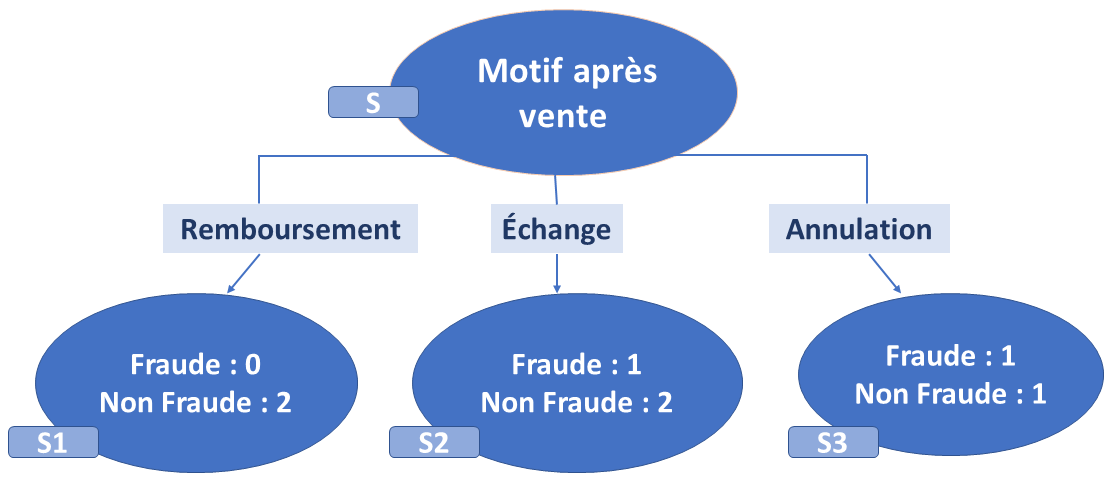

In [8]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/tableau entropy.png"
width = 500
height = 500
Image(filename=image_path, width=width, height=height)

- Probabilité d'appartenir au noeud S1 : $\frac{2}{7}$
- Probabilité d'appartenir au noeud S2 : $\frac{3}{7}$
- Probabilité d'appartenir au noeud S3 : $\frac{2}{7}$
    
Les entropies des noeuds S1,S2 et S3 par rapport à la cible sont: 
    

- $ H(S1) = - \frac{2}{2}  \ln(\frac{2}{2}) - \frac{0}{2} \ln(\frac{0}{2})$

- $ H(S2) = -\frac{2}{3}   \ln(\frac{2}{3}) - \frac{1}{3}  \ln(\frac{1}{3} )$

- $ H(S3) = -\frac{1}{2}   \ln(\frac{1}{2} ) - \frac{1}{2}   \ln(\frac{1}{2} )$



Ainsi, l'entropie de la variable catégorielle "Motif d'après vente du billet" est donnée par: 
\begin{equation}
\text{Entropy}_{\text{Motif après-vente}} = 
\frac{2}{7} \cdot H(S_1) + \frac{3}{7} \cdot H(S_2) + \frac{2}{7} \cdot H(S_3).
\end{equation}
Enfin, le gain d'information est donc :
\begin{equation}
GI_{\text{Motif après-vente}} = H(S) - \text{Entropy}_{\text{Motif après-vente}}.
\end{equation}

Le calcul de l'entropie pour une variable continue diffère légèrement de celui appliqué à une variable catégorielle. L'algorithme doit identifier des seuils potentiels pour diviser les données basées sur la variable numérique en question.


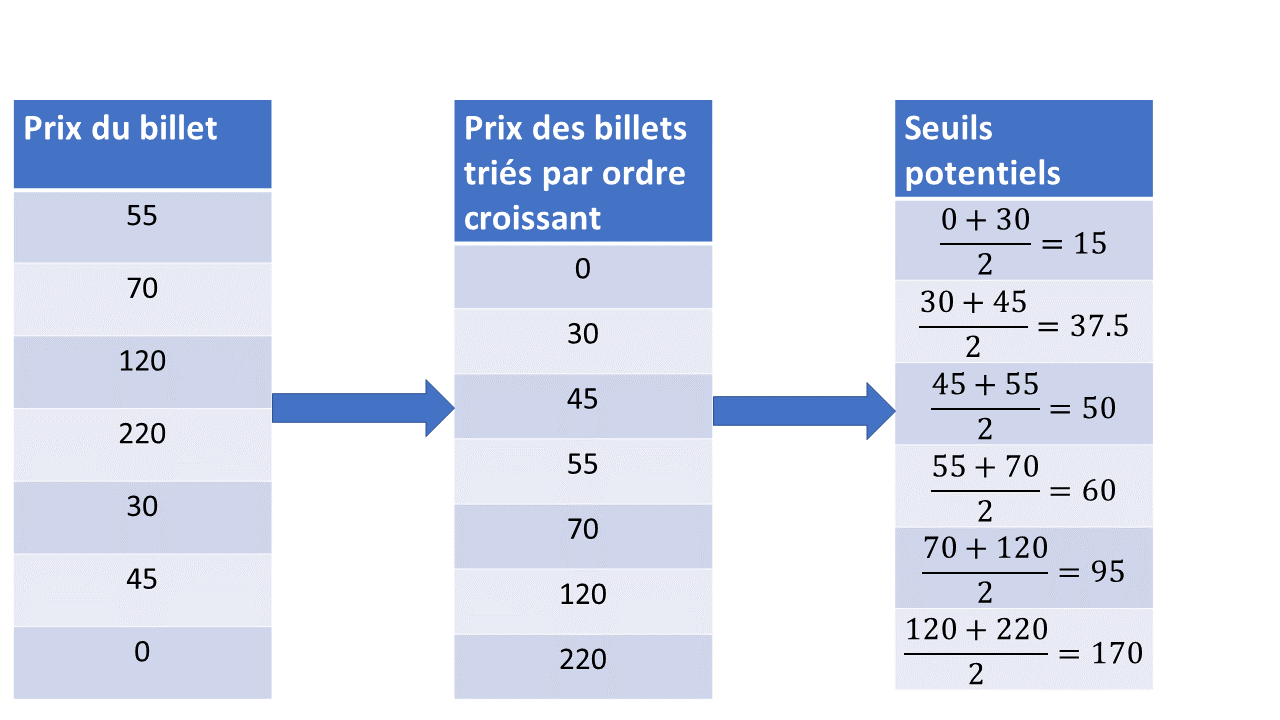

In [14]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/pg.png"
width = 500
height = 500
Image(filename=image_path, width=width, height=height)

L'algorithme de l'arbre de décision de scikit-learn ne repose pas sur une recherche exhaustive qui consisterait à prendre en compte toutes les valeurs uniques comme seuils potentiels. Cette approche est coûteuse en termes de temps de calcul, surtout lorsque la variable continue présente de nombreuses valeurs uniques. Au lieu de cela, l'algorithme suit les étapes suivantes :
- Il trie d'abord les valeurs uniques de la variable continue par ordre croissant.
- Ensuite, il calcule la moyenne entre chaque paire de valeurs consécutives pour déterminer les seuils potentiels.

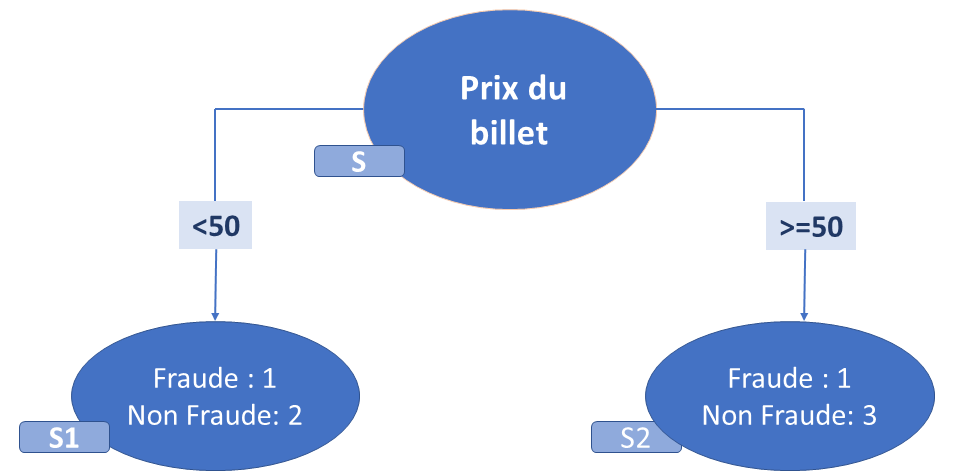

In [16]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/pg2.png"
width = 500
height = 500
Image(filename=image_path, width=width, height=height)

Pour chaque seuil candidat, les données sont divisées en deux sous-ensembles selon que les valeurs sont inférieures ou supérieures au seuil en question. De façon similaire à l'approche utilisée pour la variable catégorielle "Motif d'après-vente du billet", le calcul du gain d'information est effectué pour la variable "Prix du billet". Celle offrant le gain le plus élevé est sélectionnée pour la subdivision des données.\\
Enfin, si une variable catégorielle est celle qui maximise le gain d'information, l'algorithme doit tester aussi quelle catégorie partitionne le mieux les données en deux noeuds fils, selon la présence et l'abscence de cette catégorie. 

# Indice de Gini

L'indice de Gini est aussi une mesure d'impureté utilisée dans la construction des arbres de décision pour des problèmes de \textbf{classification}. %Généralement, il est utilisé par l'algorithme CART.

Il est calculé en considérant la probabilité qu'un élément choisi au hasard dans un noeud appartienne à une certaine classe. Il est donné par la formule suivante:

\begin{equation}
\text{Gini} = 1 - \sum_{i} p(i)^2
\end{equation}
 

où p(i) représente la probabilité d'appartenance à la classe i dans le noeud correspondant. Il est donc compris entre 0 et
1.

Plus l'indice de Gini est proche de zéro, plus le noeud est pur et les échantillons du noeud appartiennent à une seule classe. À l'inverse, un indice de Gini proche de 1 indique une distribution équilibrée des classes dans le noeud, ce qui signifie qu'il y a une diversité plus élevée des classes.


Pour calculer l'indice de Gini, nous suivons la même logique de calcul que celle que nous avons utilisée pour l'entropie. Tout commence par l'application de la formule de l'indice de Gini pour le noeud parent de l'arbre de décision, qui est au début le noeud racine : 
\begin{equation}
\text{Gini}_{\text{noeud_racine}} = 1 - \sum_{i} p(i)^2
\end{equation}, avec $p_i$ représente la probabilité d'appartenance à la classe i dans le noeud racine.

Ensuite, pour sélectionner la meilleure variable à diviser, nous appliquons la formule suivante: 
\begin{equation}
\text{Gini_variable} = \text{Gini}_{\text{noeud_racine}} - \sum_{i=1}^{k} p_i \text{Gini}_{\text{noeud_fils}(S_i)}
\end{equation}

Dans cette équation, $p_i$ désigne la probabilité d'appartenance au noeud fils $S_i$  et $Gini\_noeud\_fils(S_i)$ est l'indice de Gini de la variable cible dans le noeud fils.

Ainsi, pour continuer à calculer l'indice de Gini et le gain d'information d'une variable à partir d'un noeud autre que la racine, nous devons soustraire l'indice de Gini pondéré des nœuds fils de l'indice de Gini obtenu dans le noeud parent qui le précède. Ainsi, nous évaluons la variation de l'indice de Gini en passant d'un noeud parent à un noeud fils spécifique, ce qui nous permet de mesurer l'impact de la division sur la pureté des classes.

Plus la variable réduit l'indice de Gini, plus elle est importante.